<a href="https://colab.research.google.com/github/JoaoSiqueiraDS/DS_Days/blob/master/%5BTemplate%5D_Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---

# Detecção de Fraudes em Cartões de Crédito

Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilhão de prejuízo por ano para os últimos 12 meses.

<p align=center>
<img src="https://images.unsplash.com/photo-1592772874383-d08932d29db7?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=699&q=80" width="60%"></p>

Dentra essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acaretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*. 

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Importando os Dados

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$ 

<p align=center>
<img src="https://images.unsplash.com/photo-1620714223084-8fcacc6dfd8d?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1051&q=80" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor or igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

In [28]:
# importar os pacotes necessários

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

from imblearn.under_sampling import RandomUnderSampler

# configure Seaborn

sns.set_style('dark')

!pip install -q scikit-plot

import scikitplot as skplt

Para facilitar a aquisição dos dados, criei um *link* com acesso direto ao `csv`. Com isso, basta importar o conjunto de dados usando o método `pd.read_csv()`.

In [32]:
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

# importar os dados para um dataframe

df = pd.read_csv(file_path)

# Creating a test dataset

test = df.sample(frac=0.15, random_state=0)

Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, pode-se iniciar uma análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.

Lembre-se de realizar o *split* dos conjuntos, para evitar o vazamento de dados.

Feito isso, vamos à Análise Exploratória.

## Análise Exploratória

Abordar tópicos/informações como:

* Ver as 5 primeiras entradas
* Ver o resumo estatístico do dataframe
* Verificar se há valores ausentes
* Plotar um gráfico de barras (ou countplot) para ver o balanceamento do *dataset*
* Plotar os seguintes histogramas:
    * Variável `Time`
        * Fraude (`Class == 1`)
        * Normal (`Class == 0`)
    * Variável `Amount`
        * Fraude (`Class == 1`)
        * Normal (`Class == 0`)
* Plotar um `boxplot` para a variável `Amount` quando houve fraude (`Class == 1`)
* Plotar uma matriz de correlação

In [4]:
# Primeiras 5 linhas do dataset

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# Resumo estatístico

df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,9.289524e-16,-1.803266e-15,1.674888e-15,1.475621e-15,3.501098e-15,1.392460e-15,-7.466538e-16,4.258754e-16,9.019919e-16,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
# Verificar a existência de valores ausentes

df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


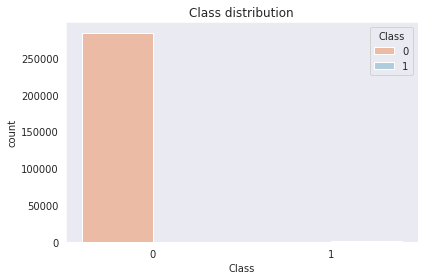

In [7]:
# plotando bar graphs

fig, ax = plt.subplots()

sns.countplot("Class", data=df, ax=ax, hue="Class", palette='RdBu')
ax.set_title("Class distribution")
plt.plot()
plt.tight_layout()

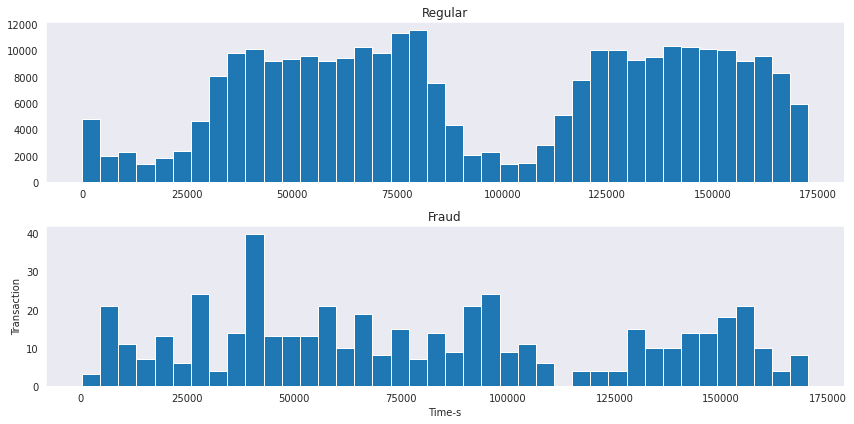

In [8]:
from IPython.core.pylabtools import figsize
# Plotando a variável time para as classes

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,6))

num_bins=40

ax[0].hist(df['Time'][df['Class']==0], bins=num_bins)
ax[1].hist(df['Time'][df["Class"]==1], bins=num_bins)

ax[0].set_title('Regular')
ax[1].set_title('Fraud')

plt.xlabel('Time-s')
plt.ylabel('Transaction')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


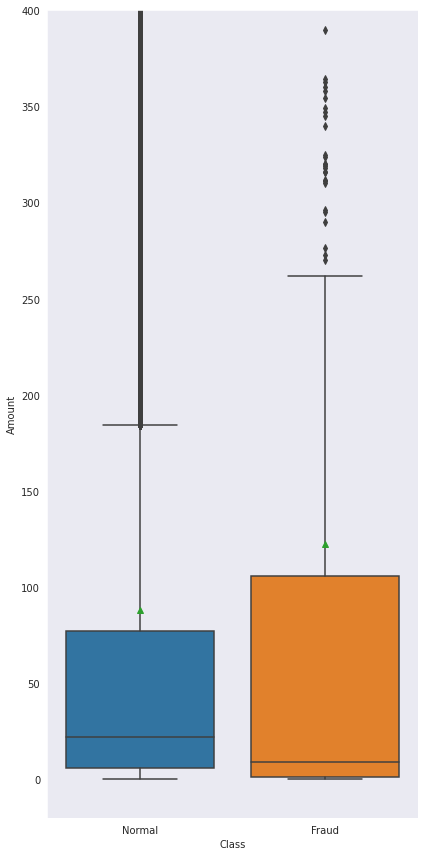

In [9]:
# Plotando variável Amount em relação ao tempo em um boxplot

fig, ax = plt.subplots(figsize=(6,12), sharex=True)

sns.boxplot(df['Class'], df['Amount'], showmeans=True, ax=ax)
plt.ylim((-20,400))
plt.xticks([0,1],['Normal','Fraud'])
plt.tight_layout()




In [10]:
# Stats das fraudes

df[(df['Class']==1) & (df["Amount"]<2000)]["Amount"].describe()

count     491.000000
mean      118.130550
std       240.439028
min         0.000000
25%         1.000000
50%         9.210000
75%       105.350000
max      1809.680000
Name: Amount, dtype: float64

In [11]:
df.loc[(df['Class']==1) & (df["Amount"]<2000), ["Amount"]].describe()

,Amount
count,491.000000
mean,118.130550
std,240.439028
min,0.000000
25%,1.000000
50%,9.210000
75%,105.350000
max,1809.680000


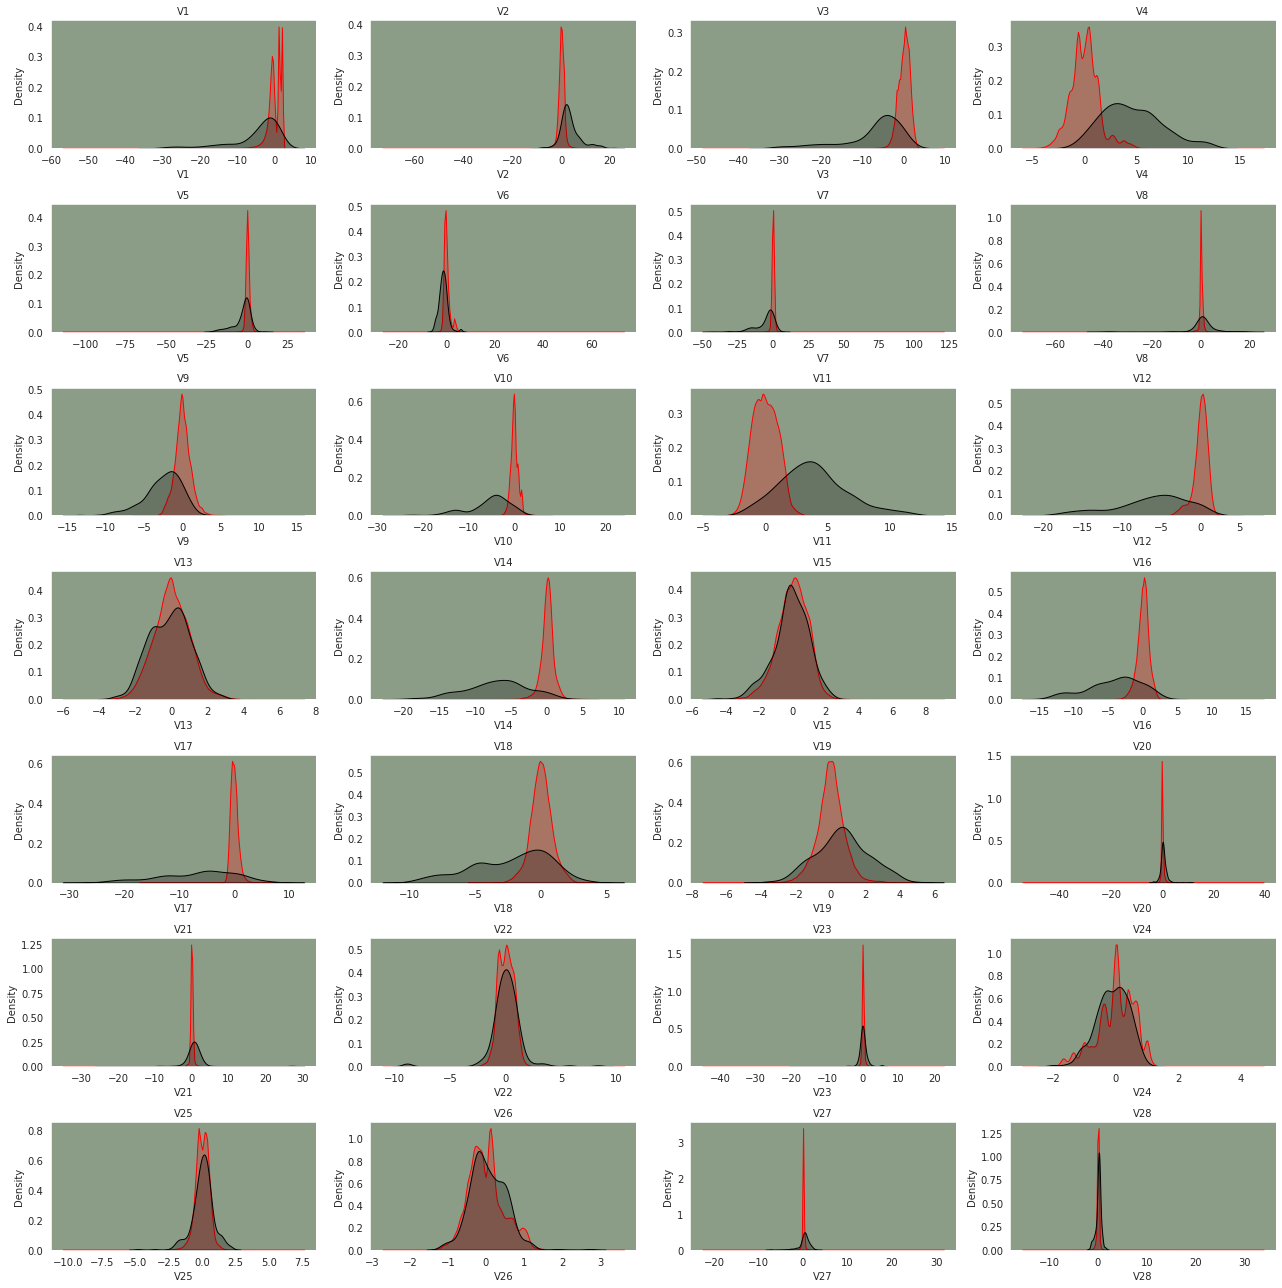

In [12]:
# Density Plots

density_df = df.drop(["Class", 'Amount', 'Time'], axis=1)
num_plots = len(density_df)

df_class_0 = df[df['Class']==0]
df_class_1 = df[df['Class']==1]

fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(18,18))
fig.subplots_adjust(hspace=1, wspace=1)
idx = 0

for col in density_df:
  idx += 1
  plt.subplot(7, 4, idx, facecolor='#8b9d87')
  sns.kdeplot(df_class_0[col], label="Class 0", shade=True, color="r")
  sns.kdeplot(df_class_1[col], label="Class 1", shade=True, color='k')
  plt.title(col, fontsize=10)
plt.tight_layout()


## Preparação dos Dados

* Normalizar os dados que ainda não haviam sido pré-processados (`Time` e `Amount`)
* Dividir o conjunto de dados entre treino e validação
* [*Recomendado*] Balancear o conjunto de dados

In [13]:
# Having Time and Amount in the same scale

df_clean = df.copy()

std_scaler = StandardScaler()
df_clean["std_amount"]=std_scaler.fit_transform(df_clean['Amount'].values.reshape(-1,1))
df_clean['std_time']=std_scaler.fit_transform(df_clean['Time'].values.reshape(-1,1))
df_clean.drop(['Time','Amount'], axis=1, inplace=True)

In [14]:
# Separate the data set in train and validation

X = df_clean.drop("Class", axis=1)
y = df['Class']

X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, shuffle=True)


In [15]:
# Balancing the data. In this project it will be done by suing the library IMBLearn and UnderSampling

rus = RandomUnderSampler()

X_rus, y_rus = rus.fit_resample(X_train, y_train)

In [16]:
# Checking how balanced the data is

print(pd.Series(y_rus).value_counts())

0    369
1    369
Name: Class, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


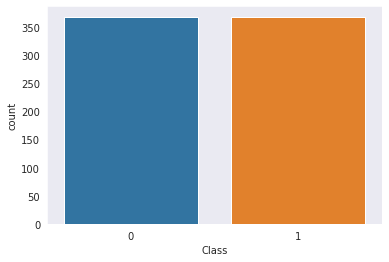

In [17]:
# Plotting the new distribution

sns.countplot(y_rus)

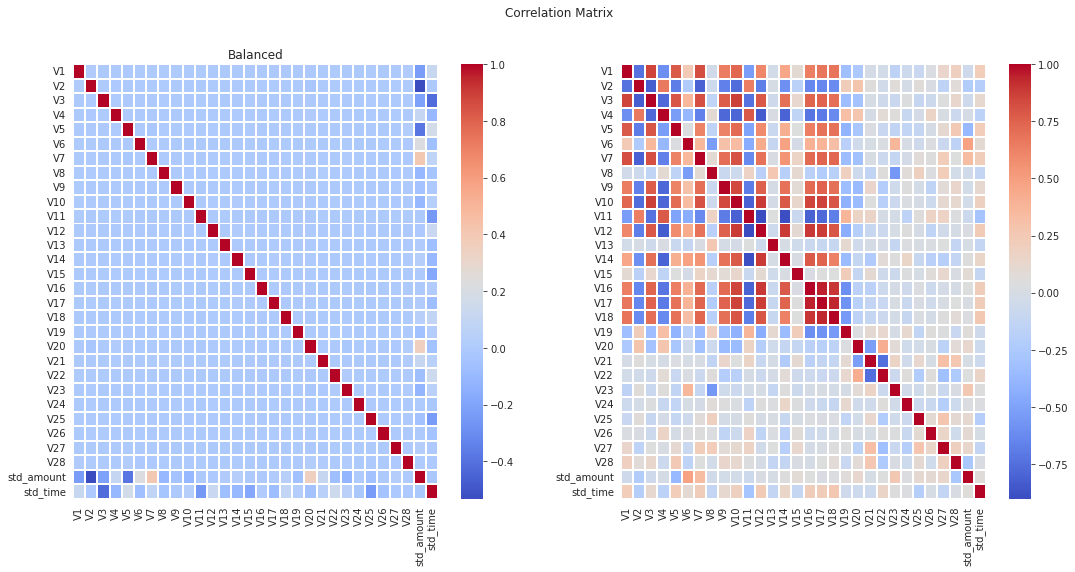

In [18]:
# Plotting a correlation matrix

corr = X_train.corr()

corr_rus = pd.DataFrame(X_rus).corr()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
fig.suptitle('Correlation Matrix')

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=1, cmap='coolwarm', ax=ax[0])
ax[0].set_title('Unbalanced')

sns.heatmap(corr_rus, xticklabels=corr_rus.columns, yticklabels=corr_rus.columns, linewidths=1, cmap='coolwarm', ax=ax[1])
ax[0].set_title('Balanced')

plt.show()

## Modelo de Machine Learning

* Construir um modelo para **classificação**.
* [*Opcional*] Construir mais de um modelo para avaliar os desempenhos

In [19]:
# Instantiating the model 1

np.random.seed(2)

model=LogisticRegression()
model.fit(X_rus, y_rus)

LogisticRegression()

In [20]:
# Instantiating model 2

from sklearn.linear_model import SGDClassifier

np.random.seed(2)

model2=SGDClassifier()
model2.fit(X_rus, y_rus)

SGDClassifier()

In [21]:
# Predicting using Model 1

y_pred = model.predict(X_val)
y_proba = model.predict_proba(X_val)

In [22]:
# Predicting using model 2

y_pred2 = model2.predict(X_val)
y_proba2 = model.predict_proba(X_val)

## Avaliar o desempenho do modelo

* Identificar a melhor métrica para esse tipo de modelo
* [*Opcional*] Comparar o desempenho entre diversos modelos

classification report: 
               precision    recall  f1-score   support

           0     0.9998    0.9779    0.9887     71079
           1     0.0664    0.9106    0.1238       123

    accuracy                         0.9777     71202
   macro avg     0.5331    0.9442    0.5563     71202
weighted avg     0.9982    0.9777    0.9872     71202

Accuracy: 0.977739389342996
AUC:0.9442123655609578


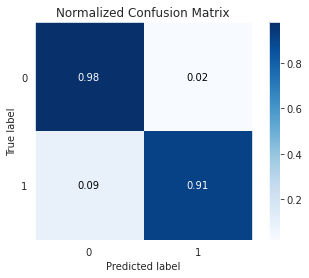

In [29]:
# Plotting Logistic Regression model

# Plotting the confusion matrix

skplt.metrics.plot_confusion_matrix(y_val, y_pred, normalize=True)

# Print classification report

print("classification report: \n", classification_report(y_val, y_pred, digits=4))

# Print model accuracy

print("Accuracy: {}".format(accuracy_score(y_val, y_pred)))

# Print area under curve

print('AUC:{}'.format(roc_auc_score(y_val, y_pred)))

classification report: 
               precision    recall  f1-score   support

           0     0.9999    0.8329    0.9088     71079
           1     0.0098    0.9512    0.0193       123

    accuracy                         0.8332     71202
   macro avg     0.5048    0.8921    0.4641     71202
weighted avg     0.9982    0.8332    0.9073     71202

Accuracy: 0.833150754192298
AUC:0.8920829760359394


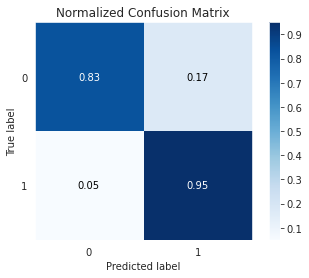

In [30]:
# Plotting SGD Classifier model

# Plotting the confusion matrix

skplt.metrics.plot_confusion_matrix(y_val, y_pred2, normalize=True)

# Print classification report

print("classification report: \n", classification_report(y_val, y_pred2, digits=4))

# Print model accuracy

print("Accuracy: {}".format(accuracy_score(y_val, y_pred2)))

# Print area under curve

print('AUC:{}'.format(roc_auc_score(y_val, y_pred2)))

# Predicting with test data

In [47]:
# Standardize the columns Amount and Time in the test dataset

test_clean = test.copy()

test_clean['std_amount'] = std_scaler.fit_transform(test_clean['Amount'].values.reshape(-1,1))
test_clean['std_time'] = std_scaler.fit_transform(test_clean['Time'].values.reshape(-1,1))

test_clean.drop(['Time','Amount'], axis=1, inplace=True)

test_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
183484,-0.323334,1.057455,-0.048341,-0.607204,1.259821,-0.091761,1.159101,-0.124335,-0.174640,-1.644401,-1.118863,0.202647,1.145965,-1.802360,-0.247178,-0.060945,0.846606,0.379454,0.847262,0.186409,-0.207098,-0.433890,-0.261613,-0.046651,0.211512,0.008297,0.108494,0.161139,0,-0.177738,0.658372
255448,-0.349718,0.932619,0.142992,-0.657071,1.169784,-0.733369,1.009985,-0.071069,-0.302083,-1.192404,-0.854776,-0.620458,-0.806471,-0.770837,-0.108158,0.258964,0.492095,-0.148516,-0.148099,-0.096502,-0.271537,-0.833209,-0.030360,0.490035,-0.404816,0.134350,0.076830,0.175562,0,-0.321945,1.320094
244749,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,0.903813,-0.219013,-1.726259,-0.736771,-1.516835,0.348343,0.041437,0.732681,-1.136766,0.816653,-1.578951,0.419835,0.701399,1.134489,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322,0,0.034666,1.219742
63919,-2.477184,0.860613,1.441850,1.051019,-1.856621,2.078384,0.510828,-0.243399,-0.260691,0.133040,1.551682,0.435125,-0.336022,0.278965,1.812232,0.080001,0.116347,0.291818,0.106228,-0.987790,0.810408,0.692245,0.150121,-0.260777,0.005183,-0.177847,-0.510060,-0.660533,0,0.838765,-0.919236
11475,1.338831,-0.547264,0.737389,-0.212383,-1.110039,-0.525744,-0.801403,-0.063672,0.997276,0.113386,0.664531,-3.282511,0.409266,1.252202,-0.868774,0.214387,1.878003,-1.906559,0.263854,-0.126871,-0.139436,-0.074719,0.067055,0.333122,0.379087,-0.268706,-0.002769,0.003272,0,-0.310490,-1.572827


In [54]:
# Separar variáveis entre X e y

X_test = test_clean.drop('Class', axis=1)
y_test = test['Class']

In [55]:
# Prediction using both models

# Logistic Regression

y_pred_t1 = model.predict(X_test)
y_proba_t1 = model.predict_proba(X_test)

# SGD Classifier

y_pred_t2 = model2.predict(X_test)
#y_proba_t2 = model2.predict_proba(X_test)

classification report: 
               precision    recall  f1-score   support

           0     0.9999    0.9780    0.9888     42647
           1     0.0676    0.9189    0.1259        74

    accuracy                         0.9779     42721
   macro avg     0.5337    0.9485    0.5574     42721
weighted avg     0.9982    0.9779    0.9873     42721

Accuracy: 0.977903138971466
AUC:0.9484622029115193


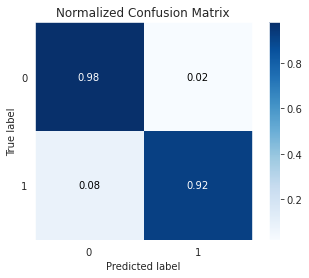

In [56]:
# Plotting Logistic Regression model - Test dataset

# Plotting the confusion matrix

skplt.metrics.plot_confusion_matrix(y_test, y_pred_t1, normalize=True)

# Print classification report

print("classification report: \n", classification_report(y_test, y_pred_t1, digits=4))

# Print model accuracy

print("Accuracy: {}".format(accuracy_score(y_test, y_pred_t1)))

# Print area under curve

print('AUC:{}'.format(roc_auc_score(y_test, y_pred_t1)))

classification report: 
               precision    recall  f1-score   support

           0     0.9999    0.8383    0.9120     42647
           1     0.0103    0.9730    0.0205        74

    accuracy                         0.8386     42721
   macro avg     0.5051    0.9056    0.4662     42721
weighted avg     0.9982    0.8386    0.9105     42721

Accuracy: 0.8385571498794504
AUC:0.9056484439512554


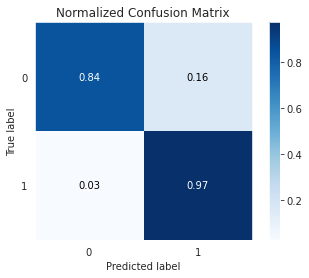

In [57]:
# Plotting SGD model - Test dataset

# Plotting the confusion matrix

skplt.metrics.plot_confusion_matrix(y_test, y_pred_t2, normalize=True)

# Print classification report

print("classification report: \n", classification_report(y_test, y_pred_t2, digits=4))

# Print model accuracy

print("Accuracy: {}".format(accuracy_score(y_test, y_pred_t2)))

# Print area under curve

print('AUC:{}'.format(roc_auc_score(y_test, y_pred_t2)))

## Conclusão

* Escrever suas conclusões a respeito da construção do modelo